# Parametric Morse Theory 

In this notebook, we run an analysis of the discrete Morse theory characteristics of some graphs whose labels are decided upon a simple spectral theory-based principle (described in detail later on). 

In [1]:
import networkx as nx
import numpy as np
from numpy import linalg as LA
import scipy
from simplicial import *
import gudhi as gd
import json
import sys

In [2]:
from DMT import *

At time slice 0, K has critical cells [[5], [1, 2]].

At time slice 0, K has gradient vector field [[[1], [1, 8]], [[8], [7, 8]], [[7], [6, 7]], [[6], [5, 6]], [[4], [4, 5]], [[3], [3, 4]], [[2], [2, 3]]].

----------------------------------------------------

At time slice 1, K has critical cells [[7], [4, 5]].

At time slice 1, K has gradient vector field [[[1], [1, 8]], [[8], [7, 8]], [[6], [6, 7]], [[5], [5, 6]], [[4], [3, 4]], [[3], [2, 3]], [[2], [1, 2]]].

----------------------------------------------------

At time slice 2, K has critical cells [[5], [7], [5, 6], [1, 2]].

At time slice 2, K has gradient vector field [[[1], [1, 8]], [[8], [7, 8]], [[6], [6, 7]], [[4], [4, 5]], [[3], [3, 4]], [[2], [2, 3]]].

----------------------------------------------------

At time slice 3, K has critical cells [[1], [5], [3, 4], [7, 8]].

At time slice 3, K has gradient vector field [[[8], [1, 8]], [[7], [6, 7]], [[6], [5, 6]], [[4], [4, 5]], [[3], [2, 3]], [[2], [1, 2]]].

--------------

## First part : discrete Morse theory

We run the example of the paper <i>Persistent Homology of Unweighted
Complex Networks via Discrete
Morse Theory</i>.

#### Initialization of the simplicial complex $K$
We build a simplicial complex $K$ by storing its edges (and nodes), and adding clique completion up to dimension 2, <i>i.e.</i> we complete all triangles. Then, we define a label function $g:K^{(0)}\rightarrow \mathbb{R}$ on the nodes of $K$ (where $K^{(0)}$ denotes the $0$-skeleton of $K$, <i>i.e.</i> its nodes).

In [24]:
K = gd.SimplexTree()

edges = [[0,1],[7,0],[1,7],[1,2],[2,3],[4,2],[2,5],[3,4],[5,7],[6,7],[7,8]]

for e in edges:
    K.insert(e)
K.expansion(2)

d = 2

g = {"[0]": 3.1,
     "[1]": 2.1,
     "[2]": 1.1,
     "[3]": 3.2,
     "[4]": 3.3,
     "[5]": 3.4,
     "[6]": 4.1,
     "[7]": 0.1,
     "[8]": 4.3
     }

#### Generating a discrete Morse function f on K
The next step is to extend the label function $g:K^{(0)}\rightarrow \mathbb{R}$ to a discrete Morse function $f:K\rightarrow \mathbb{R}$ (as introduced by R. Forman), via the algorithm designed in the paper mentioned above, called <i>Persistent Homology of Unweighted
Complex Networks via Discrete
Morse Theory</i>.

In [25]:
f = build_morse_function(K, d, g)[0]

In [26]:
print(f)

{'[0]': 3.1, '[1]': 2.1, '[2]': 1.1, '[3]': 3.2, '[4]': 3.3, '[5]': 3.4, '[6]': 4.1, '[7]': 0.1, '[8]': 4.3, '[0, 1]': 2.6, '[0, 7]': 3.571806243017261, '[1, 2]': 1.6, '[1, 7]': 2.3703675243227256, '[2, 3]': 2.1500000000000004, '[2, 4]': 2.2, '[2, 5]': 2.25, '[3, 4]': 3.450650308001466, '[5, 7]': 3.515279091500119, '[6, 7]': 2.0999999999999996, '[7, 8]': 2.1999999999999997, '[0, 1, 7]': 3.0859031215086308, '[2, 3, 4]': 2.8253251540007334}


#### Checking if the above function on K is indeed a discrete Morse function
We implemented a function called ```check_Morse()``` designed to check whether, for a given pair $(K,f)$, the function $f:K\rightarrow \mathbb{R}$ is indeed a discrete Morse function on $K$. Concretely speaking, the function simply checks whether the axioms in the definition of discrete Morse function are satisfied.

In [5]:
print(check_Morse(K, f))

True


### Printing down the critical cells
The function ```critical_cells(K,f)``` returns the list of all critical cells of the pair $(K,f)$, given in order of increasing dimension. In this example, we obtain two $0$-critical cells (nodes $2$ and $7$) and two $1$-critical cells (edges $(1,7)$ and $(5,7)$).

In [6]:
print(critical_cells(K, f))

[[2], [7], [1, 7], [5, 7]]


#### Printing down the gradient vector field V of (K,f)
The function ```gradient(K,f)``` returns the gradient vector field $V$ of $(K,f)$, as a list of pairs of regular (non-critical) cells, interpreted as arrows.

In [8]:
V = gradient(K, f)
print(V)

[[[0, 7], [0, 1, 7]], [[0], [0, 1]], [[1], [1, 2]], [[3, 4], [2, 3, 4]], [[3], [2, 3]], [[4], [2, 4]], [[5], [2, 5]], [[6], [6, 7]], [[8], [7, 8]]]


#### Drawing the Hasse diagram of (K,f,V)
The Hasse diagram of the pair $(K,V)$ consists of a graph built in the following way. Its vertices are all cells of $K$. Then, directed edges are added from any cell to its codimension-$1$ faces. Finally, all edges (in an undirected way) that belong the the gradient vector field $V$ are reversed. The function ```Hasse_diagram(K,V)``` uses the ```networkX``` library to plot the Hasse diagram of our example.

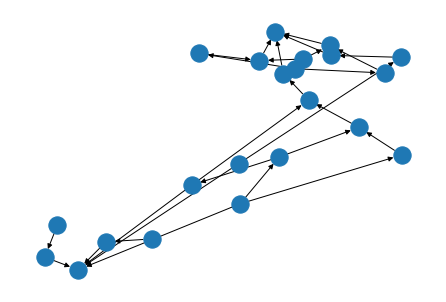

In [9]:
H = Hasse_diagram(K, V)
nx.draw(H)

#### An example of path between two cells (this is not a proper V-path, though)
The function ```V_paths(K,V,s1,s2)``` returns possible paths between any two cells, by searching paths in the Hasse diagram.

In [11]:
print(V_paths(K, V, [2,3], [2]))

[[[2, 3], [2]]]


## Second part : parametric Morse theory

### A first example : the complete graph $G=K_5$

#### Initialization of the graph G

In [12]:
G = nx.complete_graph(6)

#### Pairs of connected critical cells across all time slices

The function ```connecting_critical_cells(G)``` works as follows. It takes an unlabeled graph $G$ as input, initializes a simplicial complex $K$ by setting $K^{(0)}:=G$ and adding clique completion up to dimension $3$. Then, it considers label functions $g_i:K^{(0)}\rightarrow\mathbb{R}$ determined by a simple spectral graph theory principle (time-line is given by the increasing order of eigenvalues of the graph laplacian $L$, and labels on the nodes of $G$ at time slice $t$ are given by the coordinates of the $t$-th eigenvector of $L$). After that, it create a time-series of pairs $(K,f_i)$, where $f_i:K\rightarrow\mathbb{R}$ is a discrete Morse function on $K$, that was extended from the node labeling function $g_i:K^{(0)}\rightarrow\mathbb{R}$ via the usual algorithm.

Finally, the function runs an analysis on the critical cells and gradient vector fields of all time slices, and outputs a list of all connected critical pairs across the time-line, in the sense of the paper called <i>Parametric Morse Theory</i> (2016).

In [13]:
connecting_critical_cells(G)

We have a sequence of 5 complexes.

At time slice 0, K has critical cells [[3], [4, 5], [3, 4, 5], [1, 2, 3, 4], [1, 2, 3, 5], [1, 2, 4, 5], [1, 3, 4, 5], [2, 3, 4, 5]].

At time slice 0, K has gradient vector field [[[0, 3, 4], [0, 1, 3, 4]], [[0, 3], [0, 1, 3]], [[0, 4, 5], [0, 3, 4, 5]], [[0, 4], [0, 1, 4]], [[0], [0, 1]], [[1, 2, 3], [0, 1, 2, 3]], [[1, 2, 4], [0, 1, 2, 4]], [[1, 2, 5], [0, 1, 2, 5]], [[1, 2], [0, 1, 2]], [[1, 3, 5], [0, 1, 3, 5]], [[1, 4, 5], [0, 1, 4, 5]], [[1, 4], [1, 3, 4]], [[1, 5], [0, 1, 5]], [[1], [1, 3]], [[2, 3, 4], [0, 2, 3, 4]], [[2, 3, 5], [0, 2, 3, 5]], [[2, 3], [0, 2, 3]], [[2, 4, 5], [0, 2, 4, 5]], [[2, 4], [0, 2, 4]], [[2, 5], [0, 2, 5]], [[2], [0, 2]], [[3, 5], [0, 3, 5]], [[4], [3, 4]], [[5], [0, 5]]].

----------------------------------------------------

At time slice 1, K has critical cells [[5], [1, 2, 3, 4], [1, 2, 3, 5], [1, 2, 4, 5], [1, 3, 4, 5], [2, 3, 4, 5]].

At time slice 1, K has gradient vector field [[[0, 5], [0, 1, 5]], [[0], [0, 

### A second example : a simple stochastic block model

#### Initialization of the graph $G_2$

In [17]:
from scipy.stats import bernoulli

def stochastic_2block_model(n,p,q):
    
    if (n % 2) != 0:
        print("Please take an even integer n.")
        return 0
    
    G = nx.Graph()
    G.add_nodes_from(range(n))
    for i in range(int(n/2)):
        for j in range(int(n/2)):
            if i!=j and bernoulli.rvs(p):
                G.add_edge(i,j)
    for i in range(int(n/2),n):
        for j in range(int(n/2),n):
            if i!=j and bernoulli.rvs(p):
                G.add_edge(i,j)
    for i in range(int(n/2)):
        for j in range(int(n/2),n):
            if i!=j and bernoulli.rvs(q):
                G.add_edge(i,j)
    return G

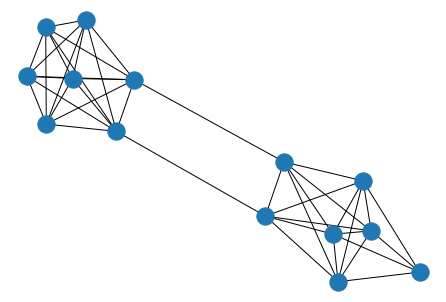

In [18]:
G2 = stochastic_2block_model(14,0.7,0.05)
nx.draw(G2)

Some question : given a stochastic block model $G_2$, is its Hasse diagram (as introduced above) also a stochastic block model? And if so, is it possible to establish a link between the probability parameters $G_2$ and the probability parameters of the Hasse diagram.

In [19]:
connecting_critical_cells(G2)

We have a sequence of 12 complexes.

At time slice 0, K has critical cells [[0], [2], [1, 11], [2, 4], [7, 10], [7, 11], [12, 13], [1, 4, 5], [2, 4, 6], [7, 9, 10], [8, 9, 11], [8, 11, 12], [9, 11, 13], [10, 12, 13], [1, 3, 4, 5], [1, 3, 4, 6], [1, 3, 5, 6], [1, 4, 5, 6], [2, 3, 4, 5], [2, 3, 4, 6], [2, 4, 5, 6], [3, 4, 5, 6], [7, 9, 11, 13], [7, 10, 12, 13], [8, 9, 10, 11], [8, 9, 10, 12], [8, 9, 10, 13], [8, 9, 11, 12], [8, 9, 11, 13], [8, 9, 12, 13], [8, 10, 11, 12], [8, 10, 11, 13], [8, 10, 12, 13], [8, 11, 12, 13], [9, 10, 11, 12], [9, 10, 11, 13], [9, 10, 12, 13], [9, 11, 12, 13], [10, 11, 12, 13]].

At time slice 0, K has gradient vector field [[[1, 3, 4], [1, 2, 3, 4]], [[1, 3, 5], [1, 2, 3, 5]], [[1, 3, 6], [1, 2, 3, 6]], [[1, 3], [1, 2, 3]], [[1, 4, 6], [1, 2, 4, 6]], [[1, 4], [1, 2, 4]], [[1, 5, 6], [1, 2, 5, 6]], [[1, 5], [1, 2, 5]], [[1, 6], [1, 2, 6]], [[1], [1, 2]], [[2, 3], [2, 3, 4]], [[2, 4, 5], [1, 2, 4, 5]], [[2, 5, 6], [2, 3, 5, 6]], [[2, 5], [2, 3, 5]], [[2, 6], [

KeyboardInterrupt: 

### A third example : the circle $S^1$

We run the whole method on the example of $S^1$ considered Figure 4 of the paper Parametric Morse Theory (2016). More precisely, we look at the circle built on a total of $8$ points, and consider $8$ gradient vector fields on it (thus a time-series of $8$ time slices).

In [22]:
G3 = nx.Graph()
for i in range(1,9):
    G3.add_node(i)
    G3.add_edge(i,i+1)
G3.add_edge(1,8)

C = []

C.append([[5],[1,2]])
C.append([[7],[4,5]])
C.append([[5],[7],[5,6],[1,2]])
C.append([[1],[5],[3,4],[7,8]])
C.append([[8],[5,6]])
C.append([[4],[7,8]])
C.append([[1],[6],[2,3],[7,8]])
C.append([[5],[4,5]])

V = []

V.append([[[1],[1,8]],[[8],[7,8]],[[7],[6,7]],[[6],[5,6]],[[4],[4,5]],[[3],[3,4]],[[2],[2,3]]])
V.append([[[1],[1,8]],[[8],[7,8]],[[6],[6,7]],[[5],[5,6]],[[4],[3,4]],[[3],[2,3]],[[2],[1,2]]])
V.append([[[1],[1,8]],[[8],[7,8]],[[6],[6,7]],[[4],[4,5]],[[3],[3,4]],[[2],[2,3]]])
V.append([[[8],[1,8]],[[7],[6,7]],[[6],[5,6]],[[4],[4,5]],[[3],[2,3]],[[2],[1,2]]])
V.append([[[1],[1,8]],[[7],[7,8]],[[6],[6,7]],[[5],[4,5]],[[4],[3,4]],[[3],[2,3]],[[2],[1,2]]])
V.append([[[8],[1,8]],[[7],[6,7]],[[6],[5,6]],[[5],[4,5]],[[3],[3,4]],[[2],[2,3]],[[1],[1,2]]])
V.append([[[8],[1,8]],[[7],[6,7]],[[5],[5,6]],[[4],[4,5]],[[3],[3,4]],[[2],[1,2]]])
V.append([[[1],[1,8]],[[8],[7,8]],[[7],[6,7]],[[6],[5,6]],[[4],[3,4]],[[3],[2,3]],[[2],[1,2]]])

In [23]:
connecting_critical_cells(G3,C,V)

At time slice 0, K has critical cells [[5], [1, 2]].

At time slice 0, K has gradient vector field [[[1], [1, 8]], [[8], [7, 8]], [[7], [6, 7]], [[6], [5, 6]], [[4], [4, 5]], [[3], [3, 4]], [[2], [2, 3]]].

----------------------------------------------------

At time slice 1, K has critical cells [[7], [4, 5]].

At time slice 1, K has gradient vector field [[[1], [1, 8]], [[8], [7, 8]], [[6], [6, 7]], [[5], [5, 6]], [[4], [3, 4]], [[3], [2, 3]], [[2], [1, 2]]].

----------------------------------------------------

At time slice 2, K has critical cells [[5], [7], [5, 6], [1, 2]].

At time slice 2, K has gradient vector field [[[1], [1, 8]], [[8], [7, 8]], [[6], [6, 7]], [[4], [4, 5]], [[3], [3, 4]], [[2], [2, 3]]].

----------------------------------------------------

At time slice 3, K has critical cells [[1], [5], [3, 4], [7, 8]].

At time slice 3, K has gradient vector field [[[8], [1, 8]], [[7], [6, 7]], [[6], [5, 6]], [[4], [4, 5]], [[3], [2, 3]], [[2], [1, 2]]].

--------------